
# My Tasks Notebook

**Rachel King**

***

This notebook contains all the tasks associated with Applied Statistics Module undertaken as part of the Higher Diploma in Science in Data Analytics, Winter 2024

- [Task 1 - Permutation and Combinations](#task-1---permutations-and-combinations)
- [Task 2 - numpy's Normal Distribution](#task-2---numpy's-normal-distribution)
- [Task 3 - t-Test Calculation](#task-3---t-Test-Calculation)
- [Task 4 - ANOVA](#task-4---anova)
- [Summary](#summary)

## Module Imports

In [1]:
# Mathematical functions from the standard library
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Data analysis
# https://pandas.pydata.org/docs/user_guide/index.html#user-guide
import pandas as pd

# Data visualisation and plotting
# https://seaborn.pydata.org/
import seaborn as sns

# Statistics
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistics
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.oneway import effectsize_oneway

## Task 1 - Permutations and Combinations

This task invovles altering the Lady Tasting Tea Experiment to involve 12 cups (number_cups) - 6 with milk in first `number_cups_milk_first` and 6 with tea in first `number_cups_tea_first`.

*A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.*

*Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing.*

*Then suppose you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.*

*Would two errors be acceptable?. Explain.*

In [2]:
number_cups = 12

number_cups_milk_first = 6

number_cups_tea_first = 6

`math.comb(n, k)`

Calculate the number of ways to choose k elements from a set of n elements where the order of the chosen elements does not matter and no element is selected more than once.

n = number of cups of tea in total = 12

k = number of cups with milk in first = 6

In [3]:
# Number of ways of selecting four cups from eight.
ways = math.comb(number_cups, number_cups_milk_first)

# Show.
ways

924

In [4]:
# The cup labels.
labels = list(range(number_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [5]:
# Show the different ways of selecting no_cups_milk_first out of no_cups of tea.
combs = list(itertools.combinations(labels, number_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

In [6]:
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[2, 3, 6, 7, 9, 11]

In [7]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {2, 3} 2
(0, 1, 2, 3, 4, 6) {2, 3, 6} 3
(0, 1, 2, 3, 4, 7) {2, 3, 7} 3
(0, 1, 2, 3, 4, 8) {2, 3} 2
(0, 1, 2, 3, 4, 9) {9, 2, 3} 3
(0, 1, 2, 3, 4, 10) {2, 3} 2
(0, 1, 2, 3, 4, 11) {11, 2, 3} 3
(0, 1, 2, 3, 5, 6) {2, 3, 6} 3
(0, 1, 2, 3, 5, 7) {2, 3, 7} 3
(0, 1, 2, 3, 5, 8) {2, 3} 2
(0, 1, 2, 3, 5, 9) {9, 2, 3} 3
(0, 1, 2, 3, 5, 10) {2, 3} 2
(0, 1, 2, 3, 5, 11) {11, 2, 3} 3
(0, 1, 2, 3, 6, 7) {2, 3, 6, 7} 4
(0, 1, 2, 3, 6, 8) {2, 3, 6} 3
(0, 1, 2, 3, 6, 9) {9, 2, 3, 6} 4
(0, 1, 2, 3, 6, 10) {2, 3, 6} 3
(0, 1, 2, 3, 6, 11) {11, 2, 3, 6} 4
(0, 1, 2, 3, 7, 8) {2, 3, 7} 3
(0, 1, 2, 3, 7, 9) {9, 2, 3, 7} 4
(0, 1, 2, 3, 7, 10) {2, 3, 7} 3
(0, 1, 2, 3, 7, 11) {11, 2, 3, 7} 4
(0, 1, 2, 3, 8, 9) {9, 2, 3} 3
(0, 1, 2, 3, 8, 10) {2, 3} 2
(0, 1, 2, 3, 8, 11) {11, 2, 3} 3
(0, 1, 2, 3, 9, 10) {9, 2, 3} 3
(0, 1, 2, 3, 9, 11) {11, 9, 2, 3} 4
(0, 1, 2, 3, 10, 11) {11, 2, 3} 3
(0, 1, 2, 4, 5, 6) {2, 6} 2
(0, 1, 2, 4, 5, 7) {2, 7} 2
(0, 1, 2, 4, 5, 8) {2} 1
(0, 1, 2, 4, 5, 9) {9, 2} 2
(0

In [8]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

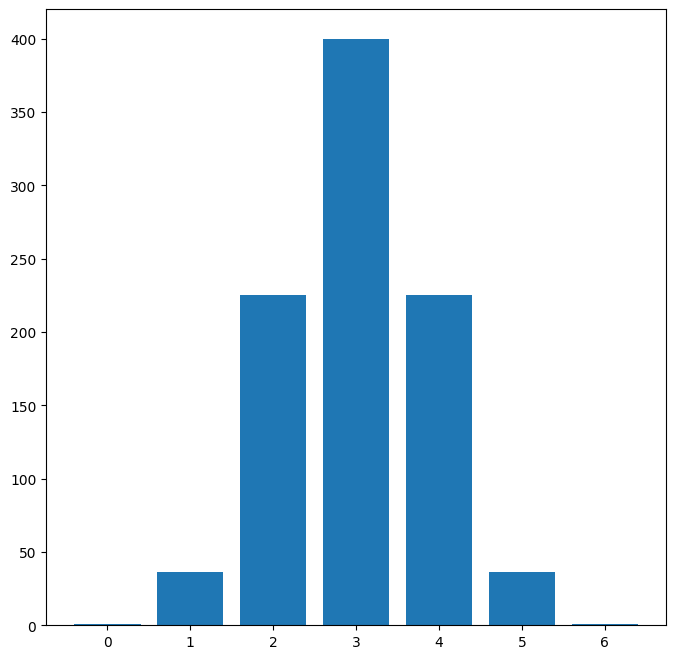

In [9]:
# Create a figure.
fig, ax = plt.subplots(figsize=(8, 8))

# Bar chart.
ax.bar(counts[0], counts[1]);

### The Null Hypothesis
 The lady has no special power to tell the difference, she is selecting 6 cups at random.

### Alternative Hypothesis
If she is picking 6 cups at random, it is unlikely she will select the correct 6. The probability is 1 in 924. Therefore, it is so unlikely, that if she does select the correct 6 cups, we are willing to accept that something non-random is happening.

In [10]:
# The probability that she (randomly) selects the 6 cups correctly
1 / 924

0.0010822510822510823

We are willing to accept one error - this means if she selects at least 5 of the cups correctly, we will reject the null hypothesis and accept that something non-random is happening in terms of selecting the cups (she is not just guessing and indeed has special powers).

In [11]:
# The probability that she (randomly) selects at least 5 cups correctly
(36 + 1) / 924

0.04004329004329004

*Would two errors be acceptable (i.e. at least 4 correct cups are selected) ? In other words, would we be happy to reject the null hypothesis if she selected at least 4 cups correctly?*

In [12]:
# The probability that she (randomly) selects at least 4 cups correctly
(225 + 36 + 1) / 924

0.28354978354978355

The probability of randomly selecting at least 4 correct cups is greater than 1 in 4. This means that more than once every 4 times this experiment is carried out the lady will select at least 4 of the cups correctly. This would not be acceptable in terms of rejecting the null hypothesis.

## Task 2 - numpy's Normal Distribution

*This task involves assessing whether numpy.random.normal() properly generates normal values. To begin, a sample of one hundred thousand values is generated using the function with mean 10.0 and standard deviation 3.0.*

*The scipy.stats.shapiro() function is used to test whether the sample came from a normal distribution.*

*Finally, a histogram of the values and the corresponding normal distribution probability density function are plotted together.*

In [13]:
# Generate a random normal sample
data = np.random.normal(10.0, 3.0, size=100000)

# Show the data
data

array([ 7.55600819,  9.72936543,  4.78030238, ..., 14.74554126,
        9.39928279, 11.68562685])

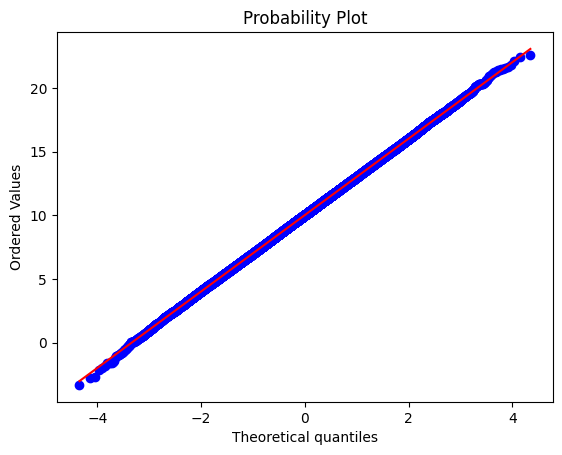

In [14]:
# Create an empty plot
fig, ax = plt.subplots()

# Create a q-q plot
stats.probplot(data, dist='norm', plot=ax);

In [15]:
# Perform the Shapiro Wilk test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

stats.shapiro(data)

c:\Users\rking\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.99997878074646, pvalue=0.887632429599762)

An acceptable p-value to reject the null hypothesis is typically 0.05 (representing a Confidence Interval of 95%). Given a null hypothesis was that the data is normally distributed, these results would mean we would have no reason to reject the null hypothesis.

### Histogram of Values and Corresponding Normal Distribution Probability Density Function 

In [16]:
# define the function with mean 10.0 and standard deviation of 3.0 
def f(x, mu=10.0, sigma=3.0):
  # The normalisation constant
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # f(x)
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

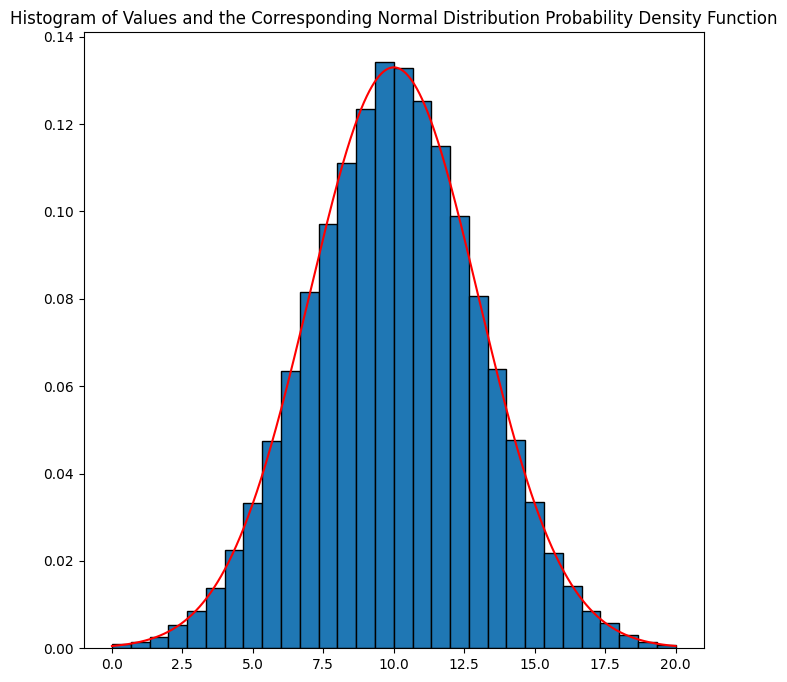

In [17]:
# Create a blank plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create a histogram
ax.hist(data, edgecolor='black', density=True, bins=np.linspace(0, 20, 31));

# Create an x range for my values
x = np.linspace(0, 20, 100001)

# Get y values
y = f(x, mu=10.0, sigma=3.0)

# Plot the function
ax.plot(x, y, 'r-')
ax.set_title('Histogram of Values and the Corresponding Normal Distribution Probability Density Function');

## Task 3 - t-Test Calculation

*This task involves considering the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.*

| Patient ID | Before | After |
| ---------- | ------ | ----- |
| 0 | 63 | 64 |
| 1 | 68 | 64 |
| 2 | 70 | 68 |
| 3 | 64 | 64 |
| 4 | 74 | 73 |
| 5 | 67 | 70 |
| 6 | 70 | 72 |
| 7 | 57 | 54 |
| 8 | 66 | 61 |
| 9 | 65 | 63 |

*Calculate the t-statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.*

A t-test is a statistical method that determines whether there is a significant difference between the means of two groups.

*Null Hypothesis* : The population means are equal.

In [18]:
# Create a numpy array for each set of data
rhr_before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
rhr_after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

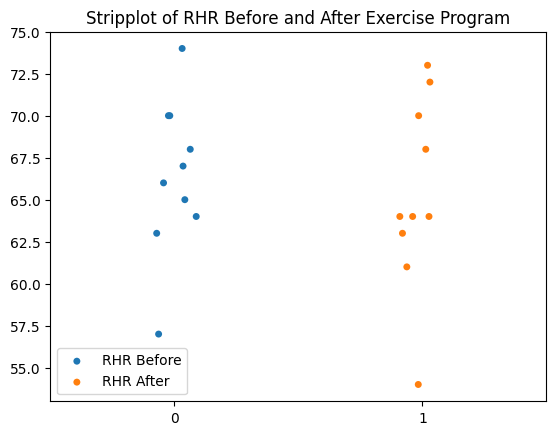

In [19]:
# Strip plot.
sns.stripplot(data=[rhr_before, rhr_after]).set_title("Stripplot of RHR Before and After Exercise Program");
plt.legend(labels=['RHR Before', 'RHR After'])

#### t-statistic using Numpy

t statistic:

![t-satistic](https://matistics.com/wp-content/uploads/2022/03/14-t-test-2-sample-related-1.jpg)


In [20]:
# Calculate the t-statistic using numpy
# https://stackoverflow.com/questions/2324438/how-to-calculate-the-statistics-t-test-with-numpy

difference = rhr_before - rhr_after

t = (np.mean(difference))/(difference.std(ddof=1)/np.sqrt(len(difference)))

# Get random samples from standard T distribution
# https://docs.scipy.org/doc/numpy-1.9.3/reference/generated/numpy.random.standard_t.html
s = np.random.standard_t(len(difference), size=100000)
p = np.sum(s<t) / float(len(s))

print(f't value = {t}')
print(f'p value = {2 * min(p, 1 - p)}')

t value = 1.3372274824806283
p value = 0.21327999999999991


#### t-statistic using Scipy Stats

We will calculate the t-statistic using `scipy.stats/ttest_rel`. This is a test for the null hypothesis that two related samples have the same mean. The samples are related in this instance as the values for resting heart rate taken before and after are taken from the same subject.

In [21]:
# Perform a paired samples t-test using Scipy stats
stats.ttest_rel(rhr_before, rhr_after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

The t-statistic returned by Scipy Stats is 1.337, with a p-value of 0.21. The t-statistic returned by using Numpy is 1.337, with a p-value of 0.21. The results returned using Numpy are extremely similar to these values.

An acceptable p-value to reject the null hypothesis is typically 0.05 (representing a Confidence Interval of 95%). With p-values returned of around 0.21 by both Scipy stats and Numpy, this would indicate there is no evidence to reject the null hypothesis and that there is no statistically significant difference between the 2 sets of data.

## Task 4 - ANOVA

*This task is to estimate the probability of committing a type II error in specific circumstances.*

*A type II error is the failure to reject a null hypothesis that is actually false (otherwise known as a false negative).*

*We must first create a variable called no_type_ii and set to 0. Then, use a loop to perform the following test 10,000 times:*

- *Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.*
- *Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.*
- *Summarise and explain the results.*

Six assumptions of One-way ANOVA:

1. Data is normally distributed
2. No significant outliers
3. Dependent variable should be continuously measured
4. Independent variable should have at least two categorical, independent groups
5. No relationship between the observations in each group or between groups
6. Homogeneity of variances, std deviations of groups should be similar

For assumption 1, the data is being generated by numpy's random generator so we will assume it is normally distributed. Similarly, for assumption 2, we would expect there to be no significant outliers due to this normal distribution. We will visualise this later to see if this is the case.

For assumption 3 above, the dependent variable which is each individual value in the sample set is continuous as it can take on an infinite number of values within a range.

For assumption 4 above the independent variable, which is the number of sample sets, has three independent groups.

In relation to assumption 5, there is no relationship between the observations in each group as they are randomly sampled using the numpy random generator.

For assumption 6, there is homogeneity of variances as we know all three groups have the same standard deviation.

In [22]:
# Simulate an ANOVA where the confidence interval is 95% (alpha = 0.05)
def simulate_anova(alpha=0.05):
    # Generate a random sample a.
    sample_a = np.random.normal(loc=4.9, scale=0.1, size=100)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=5.0, scale=0.1, size=100)
    # Generate similar sample c.
    sample_c = np.random.normal(loc=5.1, scale=0.1, size=100)
    
    # Perform the ANOVA.
    f, p = stats.f_oneway(sample_a, sample_b, sample_c)
    
    # Decide whether to not reject the null hypothesis.
    # If p is greater than alpha, we would not reject the null hypothesis.
    # This would be a Type II Error as we know the null hypothesis is false.
    if p > alpha:
        return True
    else:
        return False

We know the mean of the 3 samples is different, so we know that the null hypothesis that the means of each set of samples being the same is false. We would then expect that each time we run the test the null hypothesis will be rejected and that the means of the three sets of samples are not equal.

In [23]:
# Set a variable to record the number of Type II errors.
no_type_ii = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is not rejected (Type II error)
    if simulate_anova():
        # Increment the number of times a Type II error occurred.
        no_type_ii += 1

# Show the number of times a type II error occurred.
no_type_ii

0

To look at assumptions 1 and 2, we will visualise the data using histograms to see distribution and box plots to see if any outliers exist.

In [24]:
# Generate a random sample a.
sample_a = np.random.normal(loc=4.9, scale=0.1, size=100)
# Generate similar sample b.
sample_b = np.random.normal(loc=5.0, scale=0.1, size=100)
# Generate similar sample c.
sample_c = np.random.normal(loc=5.1, scale=0.1, size=100)

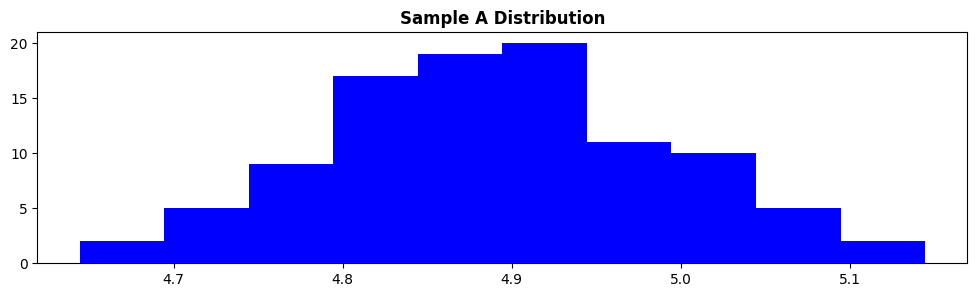

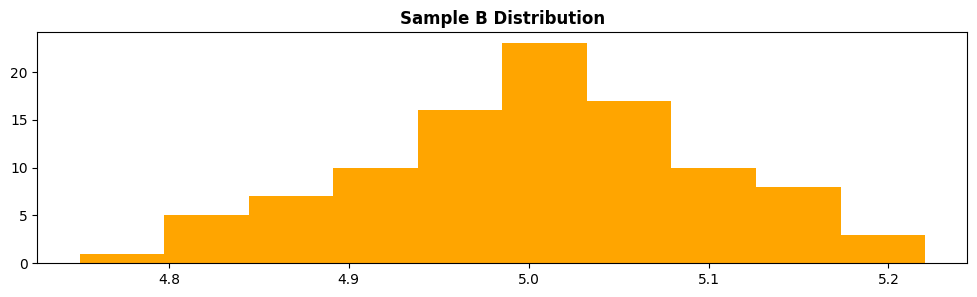

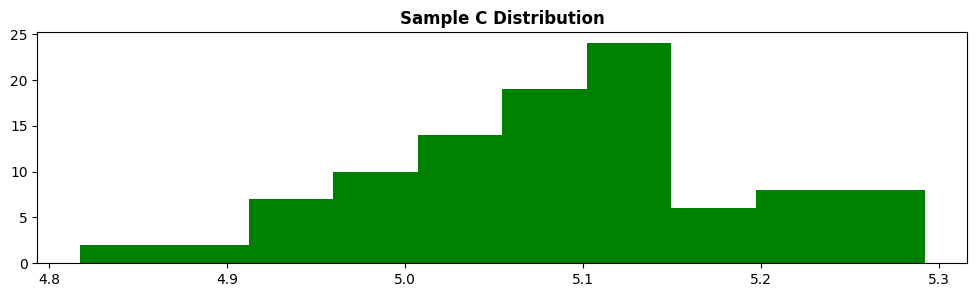

In [25]:
# Plot a histogram
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title("Sample A Distribution", fontweight='bold')
ax.hist(sample_a, bins=10, density=False, color='blue');

fig, ax = plt.subplots(figsize=(12,3))
ax.set_title("Sample B Distribution", fontweight='bold')
ax.hist(sample_b, bins=10, density=False, color='orange');

fig, ax = plt.subplots(figsize=(12,3))
ax.set_title("Sample C Distribution", fontweight='bold')
ax.hist(sample_c, bins=10, density=False, color='green');


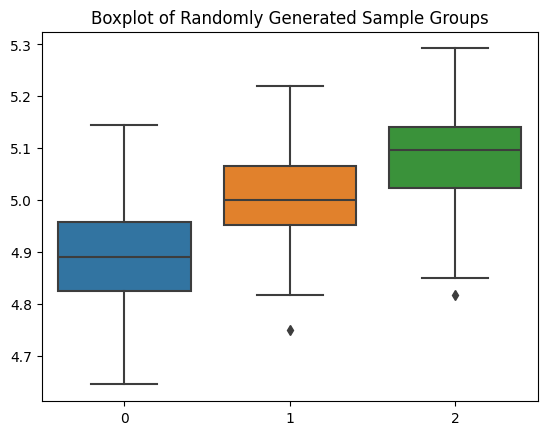

In [26]:
# Strip plot.
sns.boxplot(data=[sample_a, sample_b, sample_c]).set_title("Boxplot of Randomly Generated Sample Groups");

The data appears normally distributed from the histograms above, as would be expected.

One of two outliers may occur for each group depending on the random numbers generated.

As discussed previously and given the details outlined in the task, we know that the assumptions of One-way ANOVA are met, and ANOVA is a suitable statistical test to carry out on this data.

No type II errors occurred, which means at no stage was the null hypothesis not rejected. We know the null hypothesis is false and that means of the three sets of sample data are not equal. 

Running the test 10,000 times results in no type II errors.

Reasons for this is due to the standard deviation of the samples being so low. `sample_a` has a mean of 4.9, while the mean of `sample_c` 5.1. With the standard deviation of just 0.1 and a difference in means of 0.2, the p value being generated from a One-way ANOVA is extremely low. The p value generated by the One-way ANOVA is so small, that the likelihood of a Type II error is extremely low. Increasing the value of the standard deviation to 0.5 gives around 100 Type II errors. This represents a probability of 0.01 of a Type II error occurring. 

I also attempted to calculate the value of beta, which represents the probability of making a Type II error (failing to reject the null hypothesis when it is actually false).

In [27]:
# Calculate the effect size f for one way ANOVA
    # https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.effectsize_oneway.html
means = np.array([4.9, 5.0, 5.1])
var = (0.1 ** 2) # variance = std dev ^ 2
f2 = effectsize_oneway(means, var, 100)
# effect size is Cohen's f, square root of f2
f1 = np.sqrt(f2)

# Calculate the power of a one-way ANOVA
# https://www.statsmodels.org/dev/generated/statsmodels.stats.power.FTestAnovaPower.power.html#statsmodels.stats.power.FTestAnovaPower.power
power = sm.stats.power.FTestAnovaPower().power(effect_size=f1, nobs=100, alpha=0.05, k_groups=3)
beta = (1 - power)

# Show beta
beta

6.123924589651608e-09

We can see the value of beta is extremely low, indicating the probability of a Type II error occurring is extremely low given the values obtained.

In [28]:
# Simulate an ANOVA
def simulate_anova(beta = (1 - power)):
    # Generate a random sample a.
    sample_a_2 = np.random.normal(loc=4.9, scale=0.1, size=100)
    # Generate similar sample b.
    sample_b_2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    # Generate similar sample c.
    sample_c_2 = np.random.normal(loc=5.1, scale=0.1, size=100)
    
    # Perform the ANOVA
    f, p = stats.f_oneway(sample_a_2, sample_b_2, sample_c_2)
    
    # Decide whether to not reject the null hypothesis.
    if p > beta:
        return True
    else:
        return False

In [29]:
no_type_ii = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is not rejected (Type II error)
    if simulate_anova():
        # Increment the number of times a Type II error occurred.
        no_type_ii += 1

# Show the number of times a Type II error occurred.
no_type_ii

0

## Summary

This notebook was used to complete tasks as prescribed in the Applied Statistics module for Winter semester 2024 in the as part of the Higher Diploma in Science in Data Analytics.

The tasks involved understanding the stochastic nature of real-world measurements, selecting appropriate statistical tests in investigate a claim and performing statistical tests on data sets.